In [2]:
import numpy as np
import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

In [20]:
path = "algebra_2005_2006_train.txt"

data = pd.read_csv(path, encoding = "ISO-8859-15",sep='\t',low_memory=False)

In [4]:
pd.set_option('display.max_columns', 500)
data.head()

,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
0,1,0BrbPbwCMz,"Unit ES_04, Section ES_04-1",EG4-FIXED,1,3(x+2) = 15,2005-09-09 12:24:35.0,2005-09-09 12:24:49.0,2005-09-09 12:25:15.0,2005-09-09 12:25:15.0,40.0,NaN,40.0,0,2,3,1,[SkillRule: Eliminate Parens; {CLT nested; CLT...,1
1,2,0BrbPbwCMz,"Unit ES_04, Section ES_04-1",EG4-FIXED,1,x+2 = 5,2005-09-09 12:25:15.0,2005-09-09 12:25:31.0,2005-09-09 12:25:31.0,2005-09-09 12:25:31.0,16.0,16.0,NaN,1,0,0,1,"[SkillRule: Remove constant; {ax+b=c, positive...",1~~1
2,3,0BrbPbwCMz,"Unit ES_04, Section ES_04-1",EG40,1,2-8y = -4,2005-09-09 12:25:36.0,2005-09-09 12:25:43.0,2005-09-09 12:26:12.0,2005-09-09 12:26:12.0,36.0,NaN,36.0,0,2,3,1,"[SkillRule: Remove constant; {ax+b=c, positive...",2
3,4,0BrbPbwCMz,"Unit ES_04, Section ES_04-1",EG40,1,-8y = -6,2005-09-09 12:26:12.0,2005-09-09 12:26:34.0,2005-09-09 12:26:34.0,2005-09-09 12:26:34.0,22.0,22.0,NaN,1,0,0,1,"[SkillRule: Remove coefficient; {ax+b=c, divid...",1~~1
4,5,0BrbPbwCMz,"Unit ES_04, Section ES_04-1",EG40,2,-7y-5 = -4,2005-09-09 12:26:38.0,2005-09-09 12:28:36.0,2005-09-09 12:28:36.0,2005-09-09 12:28:36.0,118.0,118.0,NaN,1,0,0,1,"[SkillRule: Remove constant; {ax+b=c, positive...",3~~1


In [5]:
data.columns = data.columns.str.replace(' ', '_')
data.head()

,Row,Anon_Student_Id,Problem_Hierarchy,Problem_Name,Problem_View,Step_Name,Step_Start_Time,First_Transaction_Time,Correct_Transaction_Time,Step_End_Time,Step_Duration_(sec),Correct_Step_Duration_(sec),Error_Step_Duration_(sec),Correct_First_Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
0,1,0BrbPbwCMz,"Unit ES_04, Section ES_04-1",EG4-FIXED,1,3(x+2) = 15,2005-09-09 12:24:35.0,2005-09-09 12:24:49.0,2005-09-09 12:25:15.0,2005-09-09 12:25:15.0,40.0,NaN,40.0,0,2,3,1,[SkillRule: Eliminate Parens; {CLT nested; CLT...,1
1,2,0BrbPbwCMz,"Unit ES_04, Section ES_04-1",EG4-FIXED,1,x+2 = 5,2005-09-09 12:25:15.0,2005-09-09 12:25:31.0,2005-09-09 12:25:31.0,2005-09-09 12:25:31.0,16.0,16.0,NaN,1,0,0,1,"[SkillRule: Remove constant; {ax+b=c, positive...",1~~1
2,3,0BrbPbwCMz,"Unit ES_04, Section ES_04-1",EG40,1,2-8y = -4,2005-09-09 12:25:36.0,2005-09-09 12:25:43.0,2005-09-09 12:26:12.0,2005-09-09 12:26:12.0,36.0,NaN,36.0,0,2,3,1,"[SkillRule: Remove constant; {ax+b=c, positive...",2
3,4,0BrbPbwCMz,"Unit ES_04, Section ES_04-1",EG40,1,-8y = -6,2005-09-09 12:26:12.0,2005-09-09 12:26:34.0,2005-09-09 12:26:34.0,2005-09-09 12:26:34.0,22.0,22.0,NaN,1,0,0,1,"[SkillRule: Remove coefficient; {ax+b=c, divid...",1~~1
4,5,0BrbPbwCMz,"Unit ES_04, Section ES_04-1",EG40,2,-7y-5 = -4,2005-09-09 12:26:38.0,2005-09-09 12:28:36.0,2005-09-09 12:28:36.0,2005-09-09 12:28:36.0,118.0,118.0,NaN,1,0,0,1,"[SkillRule: Remove constant; {ax+b=c, positive...",3~~1


In [6]:
data.describe()

,Row,Problem_View,Step_Duration_(sec),Correct_Step_Duration_(sec),Error_Step_Duration_(sec),Correct_First_Attempt,Incorrects,Hints,Corrects
count,8.096940e+05,809694.000000,808775.000000,620129.000000,188646.000000,809694.000000,809694.000000,809694.000000,809694.000000
mean,5.403042e+05,1.692636,27.744935,18.071478,59.544133,0.766514,0.504276,0.302483,1.174170
std,3.116039e+05,1.834555,55.246830,34.796694,88.241827,0.423049,2.036774,1.242620,0.804606
min,1.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.707982e+05,1.000000,5.000000,5.000000,16.000000,1.000000,0.000000,0.000000,1.000000
50%,5.394415e+05,1.000000,11.000000,8.000000,31.000000,1.000000,0.000000,0.000000,1.000000
75%,8.094898e+05,2.000000,27.000000,18.000000,66.000000,1.000000,0.000000,0.000000,1.000000
max,1.080616e+06,49.000000,2701.000000,1907.000000,2701.000000,1.000000,333.000000,217.000000,73.000000


In [7]:
print("The number of records: "+ str(len(data['Row'].unique())))

The number of records: 809694


In [8]:
print('Part of missing values for every column')
print(data.isnull().sum() / len(data))

Part of missing values for every column
Row                            0.000000
Anon_Student_Id                0.000000
Problem_Hierarchy              0.000000
Problem_Name                   0.000000
Problem_View                   0.000000
Step_Name                      0.000000
Step_Start_Time                0.001135
First_Transaction_Time         0.000000
Correct_Transaction_Time       0.031927
Step_End_Time                  0.000000
Step_Duration_(sec)            0.001135
Correct_Step_Duration_(sec)    0.234119
Error_Step_Duration_(sec)      0.767016
Correct_First_Attempt          0.000000
Incorrects                     0.000000
Hints                          0.000000
Corrects                       0.000000
KC(Default)                    0.250303
Opportunity(Default)           0.250303
dtype: float64


In [9]:
len(data.Anon_Student_Id.unique())

574

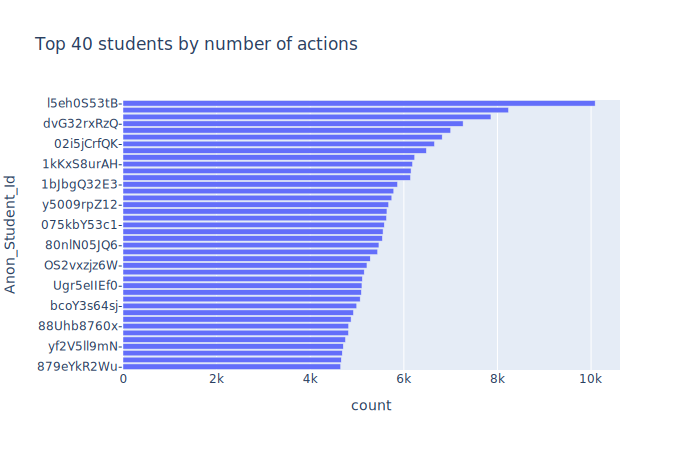

In [10]:
ds = data['Anon_Student_Id'].value_counts().reset_index()

ds.columns = [
    'Anon_Student_Id',
    'count'
]

ds['Anon_Student_Id'] = ds['Anon_Student_Id'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(40)

fig = px.bar(
    ds,
    x = 'count',
    y = 'Anon_Student_Id',
    orientation='h',
    title='Top 40 students by number of actions'
)

fig.show("svg")

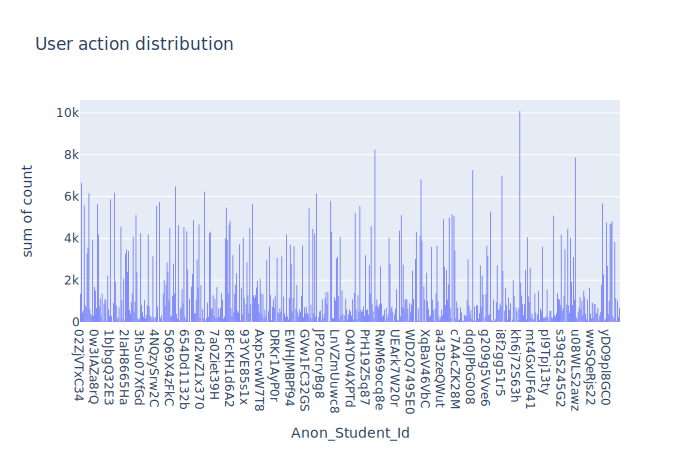

In [11]:
ds = data['Anon_Student_Id'].value_counts().reset_index()

ds.columns = [
    'Anon_Student_Id',
    'count'
]

ds = ds.sort_values('Anon_Student_Id')

fig = px.histogram(
    ds,
    x = 'Anon_Student_Id',
    y = 'count',
    title = 'User action distribution'
)

fig.show("svg")

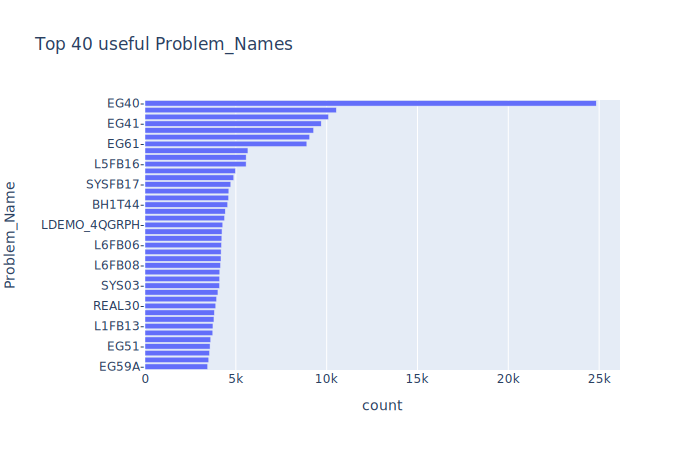

In [12]:
ds = data['Problem_Name'].value_counts().reset_index()

ds.columns = [
    'Problem_Name',
    'count'
]

ds['Problem_Name'] = ds['Problem_Name'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(40)

fig = px.bar(
    ds,
    x = 'count',
    y = 'Problem_Name',
    orientation = 'h',
    title = 'Top 40 useful Problem_Names'
)

fig.show("svg")

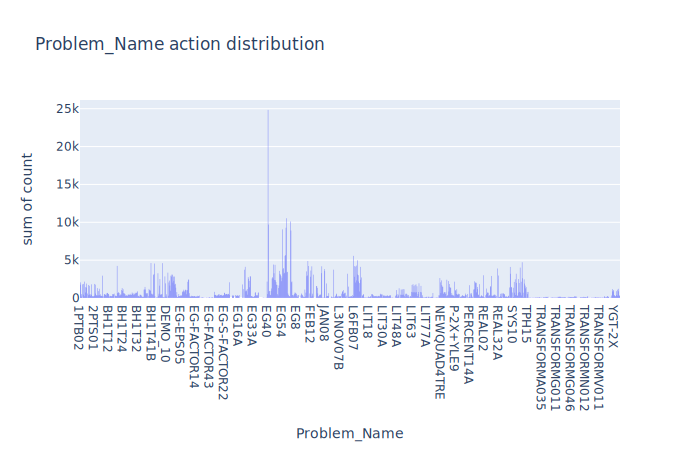

In [13]:
ds = data['Problem_Name'].value_counts().reset_index()

ds.columns = [
    'Problem_Name', 
    'count'
]

ds = ds.sort_values('Problem_Name')

fig = px.histogram(
    ds, 
    x='Problem_Name', 
    y='count', 
    title='Problem_Name action distribution'
)

fig.show("svg")

In [14]:
print(data.Corrects.unique())

[ 1  2  0  3  4  8  6  9  7  5 13 17 10 11 21 12 18 16 14 15 23 27 26 24
 20 31 28 37 29 19 25 30 48 33 22 34 41 46 38 40 60 32 44 73 35]


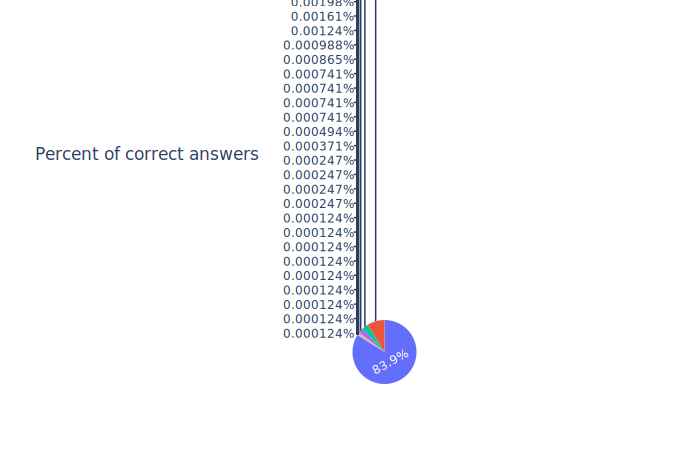

In [22]:
ds = data['Corrects'].value_counts().reset_index()

ds.columns = [
    'Corrects',
    'percent'
]

ds['percent'] /= len(data)
ds = ds.sort_values(['percent'])

fig = px.pie(
    ds,
#     names = ['wrong', 'right'],
    values = 'percent',
    title = 'Percent of correct answers'    
)


fig.show("svg")

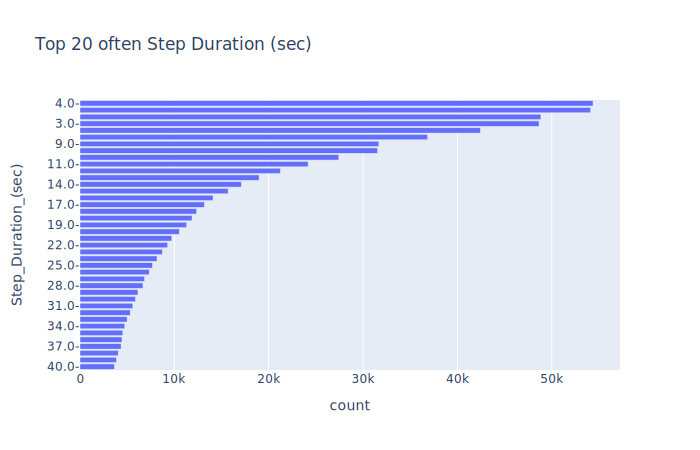

In [16]:
ds = data['Step_Duration_(sec)'].value_counts().reset_index()

ds.columns = [
    'Step_Duration_(sec)',
    'count'
]

ds['Step_Duration_(sec)'] = ds['Step_Duration_(sec)'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(40)

fig = px.bar(
    ds,
    x = 'count',
    y = 'Step_Duration_(sec)',
    orientation = 'h',
    title = 'Top 20 often Step Duration (sec)'
)

fig.show("svg")

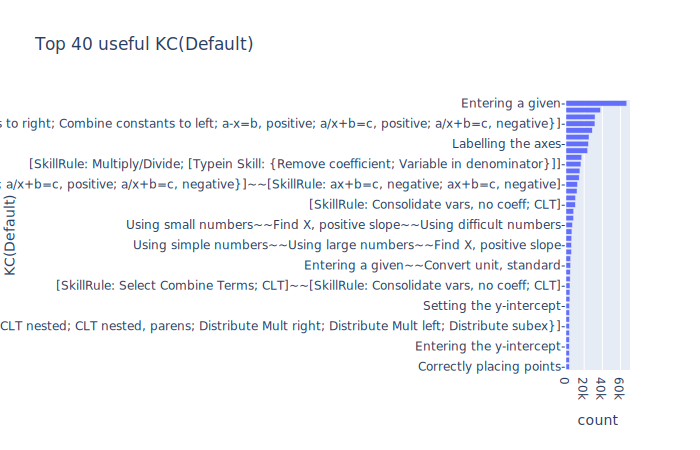

In [19]:
ds = data['KC(Default)'].dropna() # There are less NaNs in 'skill_id' column than 'skill_name' column.
ds = ds.value_counts().reset_index()

ds.columns = [
    'KC(Default)',
    'count'
]

ds['KC(Default)'] = ds['KC(Default)'].astype(str) + '-'
ds = ds.sort_values(['count']).tail(40)

fig = px.bar(
    ds,
    x = 'count',
    y = 'KC(Default)',
    orientation = 'h',
    title = 'Top 40 useful KC(Default)'
)


fig.show("svg")